In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

# Data loading

In [2]:
items = pd.read_csv(r'./items.csv')
items2 = pd.read_csv(r'./items2.csv')

In [3]:
feedbacks = pd.read_csv(r'./feedbacks.csv')

# Data preparation

In [17]:
feedbacks.isna().sum()

hash_str                  0
category                  0
marketplace               0
item_hash                 0
date                      0
giver_hash                0
receiver_hash             0
message                8193
order_title              11
feedback_value            0
order_amount_usd          0
norm_feedback_value       0
norm_order_value          0
dtype: int64

There are around 8200 feedbacks with NaN values. Mostly in the message field. Since this is not important for our analysis we do not drop these rows.

In [18]:
feedbacks.marketplace.value_counts()

Alphabay                 288485
Evolution                128840
Silk Road 1               52564
Silk Road 2               50611
Agora                     22539
Black Market Reloaded      8379
Pandora                    7910
Hydra                      4876
Name: marketplace, dtype: int64

In [19]:
feedbacks.category.value_counts()

cash-out                                     237166
other                                         84081
other - account                               75503
other - guide                                 57385
other - fake                                  34438
other - voucher/invite/codes/lottery/gift     22777
other - custom                                18760
other - pirated software                      11244
website                                        8600
e-mail                                         4702
phone                                          2734
malware                                        2446
exploits                                       1337
app                                            1175
botnet                                          968
RAT                                             768
hosting                                         120
Name: category, dtype: int64

In [20]:
items.isna().sum()

item_hash             0
category              0
marketplace           0
title                 2
vendor_hash           0
total_sales           0
first_observed        0
last_observed         0
ships_to          11532
ships_from         1164
description        9204
dtype: int64

Since we are going to take out the entries that are talking about drugs. We are going to remove all titles and descriptions that contain NaN values.

In [21]:
items2 = items[items['title'].notna()]
items2 = items2[items2['description'].notna()]

In [22]:
items2.isna().sum()

item_hash            0
category             0
marketplace          0
title                0
vendor_hash          0
total_sales          0
first_observed       0
last_observed        0
ships_to          2511
ships_from        1163
description          0
dtype: int64

We are first going to look at all rows that contain milligram in the title or description, considering this is about a real life product.

In [23]:
print(items2['title'].str.contains('milligram').value_counts())
print(items2['description'].str.contains('milligram').value_counts())

False    35370
True         3
Name: title, dtype: int64
False    35342
True        31
Name: description, dtype: int64


There are 3 entries which contain milligram in the title. There are 31 which contain it in the description.

In [24]:
items3 = items2[~items2['title'].str.contains('milligram')]

In [25]:
items4 = items3[~items3['description'].str.contains('milligram')]

Also the ones that contain 'gram' in the name will be removed.

In [26]:
print(items2['title'].str.contains('gram').value_counts())
print(items2['description'].str.contains('gram').value_counts())

False    35026
True       347
Name: title, dtype: int64
False    32441
True      2932
Name: description, dtype: int64


In [27]:
items4 = items4[~items4['description'].str.contains('gram')]
items4 = items4[~items4['title'].str.contains('gram')]

In [28]:
print(items2['title'].str.contains('mg').value_counts())
print(items2['description'].str.contains('mg').value_counts())

False    34739
True       634
Name: title, dtype: int64
False    33353
True      2020
Name: description, dtype: int64


In [29]:
items4 = items4[~items4['description'].str.contains('mg')]
items4 = items4[~items4['title'].str.contains('mg')]

In [30]:
items4 = items4[~items4['description'].str.contains('cocktail')]
items4 = items4[~items4['title'].str.contains('cocktail')]

In [31]:
print(items2['title'].str.contains('drug').value_counts())
print(items2['description'].str.contains('drug').value_counts())

False    35304
True        69
Name: title, dtype: int64
False    34414
True       959
Name: description, dtype: int64


In [32]:
items4 = items4[~items4['description'].str.contains('meth')]
items4 = items4[~items4['title'].str.contains('meth')]

In [33]:
items4 = items4[~items4['description'].str.contains('xtc')]
items4 = items4[~items4['title'].str.contains('xtc')]

In [34]:
items4 = items4[~items4['description'].str.contains('drug')]
items4 = items4[~items4['title'].str.contains('drug')]

In [35]:
items4.tail()

,item_hash,category,marketplace,title,vendor_hash,total_sales,first_observed,last_observed,ships_to,ships_from,description
44565,fff3acae7c4256deb992089469f3d595,other,Alphabay,NCR SELFSERV PIN PAD STP FILES,d4c3359eb348131f152afee016a597b4,36.12,2015-09-28,2017-04-12,Worldwide,Worldwide,AS the title says full ncr package ncr pin pad...
44566,fff547e77192ab800f29922561fd97ab,other - fake,Alphabay,Australian ID Scans - Passport,43af7b4e019364fee5295091cdbd44dd,189.23,2016-09-20,2017-01-03,Worldwide,Australia,Buy this listing and you will receive a link t...
44568,fff869121937fdc6bb2f3389f537795f,other - custom,Silk Road 2,custom-doolz,66bae735d8fcb7b37b6d377566e6399d,899.69,2014-04-16,2014-04-16,Australia,Australia,11 vails
44571,fffad0cfa5bb7ce6f2a1ca2638361f72,cash-out,Pandora,VISA US PACK : 3 CLASSIC CC + 2 PLATINIUM CC,76d4bea7d66a1fb757b978f8e7385dd4,90.20,2014-04-22,2014-04-22,Worldwide,United States,HIGH QUALITY US CC'S.\r\n\r\n3 US CLASSIC VISA...
44574,fffbefcbc5f9ba77768accef3f1f676a,other,Alphabay,a customer listing for bg,2e6c66675750bf70dd4c77014685872b,150.00,2016-01-04,2016-01-04,Worldwide,Worldwide,Cartier 18k love Bangles 750 titanium steel Re...


We have tried to in this way remove as much drugs from the dataset as possible.
(I did see that this does not remove all offline things as apparently also pin pads etc are sold... Should we also remove these from there?)

# Checking the times of the marketplaces

In [37]:
feedbacks.groupby('marketplace').agg({'date' : [np.min, np.max]}).count()

date  amin    8
      amax    8
dtype: int64

In [38]:
feedbacks.groupby(by = ['marketplace', 'category']).count()

hash_str  item_hash  \
marketplace category                                                         
Agora       RAT                                               6          6   
            app                                              35         35   
            botnet                                           83         83   
            cash-out                                       6626       6626   
            e-mail                                           20         20   
...                                                         ...        ...   
Silk Road 2 other - guide                                 19535      19535   
            other - pirated software                        274        274   
            other - voucher/invite/codes/lottery/gift      2524       2524   
            phone                                           200        200   
            website                                          76         76   

                                                        date  giver_hash  \
marketplace category                                                       
Agora       RAT                                            6           6   
            app                                           35          35   
            botnet                                        83          83   
            cash-out                                    6626        6626   
            e-mail                                        20          20   
...                                                      ...         ...   
Silk Road 2 other - guide                              19535       19535   
            other - pirated software                     274         274   
            other - voucher/invite/codes/lottery/gift   2524        2524   
            phone                                        200         200   
            website                                       76          76   

                                                       receiver_hash  message  \
marketplace category                                                            
Agora       RAT                                                    6        6   
            app                                                   35       35   
            botnet                                                83       83   
            cash-out                                            6626     6626   
            e-mail                                                20       20   
...                                                              ...      ...   
Silk Road 2 other - guide                                      19535    19535   
            other - pirated software                             274      274   
            other - voucher/invite/codes/lottery/gift           2524     2524   
            phone                                                200      200   
            website                                               76       76   

                                                       order_title  \
marketplace category                                                 
Agora       RAT                                                  6   
            app                                                 35   
            botnet                                              83   
            cash-out                                          6626   
            e-mail                                              20   
...                                                            ...   
Silk Road 2 other - guide                                    19535   
            other - pirated software                           274   
            other - voucher/invite/codes/lottery/gift         2524   
            phone                                              200   
            website                                             76   

                                                       feedback_value  \
marketplace c

Since we want to look at the marketplaces over a specific time we are going to identify what the first time and what the last time was that the date was observed.

In [39]:
feedbacks['date']= pd.to_datetime(feedbacks['date']) 

In [40]:
feedbacks_time = feedbacks.groupby(['marketplace']).agg({'date': [np.min,np.max]})
feedbacks_time

date           
                            amin       amax
marketplace                                
Agora                 2013-12-25 2015-02-11
Alphabay              2014-12-31 2017-05-26
Black Market Reloaded 2012-11-25 2013-11-30
Evolution             2014-01-14 2015-02-19
Hydra                 2014-04-14 2014-10-26
Pandora               2013-11-02 2014-10-13
Silk Road 1           2011-06-22 2013-08-19
Silk Road 2           2013-11-26 2014-10-28

In [41]:
feedbacks_time['difference'] = feedbacks_time['date' ,'amax'] - feedbacks_time['date', 'amin']

In [178]:
feedbacks_time

date            difference
                            amin       amax           
marketplace                                           
Agora                 2013-12-25 2015-02-11   413 days
Alphabay              2014-12-31 2017-05-26   877 days
Black Market Reloaded 2012-11-25 2013-11-30   370 days
Evolution             2014-01-14 2015-02-19   401 days
Hydra                 2014-04-14 2014-10-26   195 days
Pandora               2013-11-02 2014-10-13   345 days
Silk Road 1           2011-06-22 2013-08-19   789 days
Silk Road 2           2013-11-26 2014-10-28   336 days

# Plotting

To normalize the data (order-value and feedback-value) the following code was adopted. Normalization was performed to account for the lifetime of the markets.

In [ ]:
def normalize_feedback(marketplace, feedback_value):
    deltatime = int(feedbacks_time.loc[[marketplace]]['difference', ''])
    norm_value = feedback_value / deltatime * 365
    return norm_value

In [ ]:
feedbacks['norm_feedback_value'] = feedbacks.apply(lambda x: normalize_feedback(x['marketplace'], x['feedback_value']), axis = 1)

In [ ]:
def normalize_order_value(marketplace, order_amount_usd):
    deltatime = int(feedbacks_time.loc[[marketplace]]['difference', ''])
    norm_value = order_amount_usd / deltatime * 365
    return norm_value

In [ ]:
feedbacks['norm_order_value'] = feedbacks.apply(lambda x: normalize_order_value(x['marketplace'], x['order_amount_usd']), axis = 1)

Since the code above takes a pretty long time to rune the feedback was then saved as feedbacks.csv

In [ ]:
feedbacks.to_csv(r'feedbacks.csv', index = False)

## Timeseries

### Share of total order value of cash-out

We are only looking at the cash-out category thus we first filter on these.

In [234]:
feedbacks_wo_drugs = feedbacks[feedbacks.category != "other"]

In [235]:
feedbacks_wo_drugs.loc[feedbacks_wo_drugs.category != "cash-out", 'category'] = "other"

C:\Users\cvolt\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [236]:
feedbacks_wo_drugs["month"] = pd.DatetimeIndex(feedbacks_wo_drugs["date"]).month
feedbacks_wo_drugs["year"] = pd.DatetimeIndex(feedbacks_wo_drugs["date"]).year

C:\Users\cvolt\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cvolt\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [237]:
order_category = feedbacks_wo_drugs.groupby(["date", "category"]).sum().order_amount_usd.unstack().fillna(value = 0)
order_category.index = pd.to_datetime(order_category.index)
order_category = order_category.groupby(pd.Grouper(freq = "M")).sum()

In [238]:
series = pd.Series(order_category.index.values)
x = list(series.dt.strftime('%Y-%m'))
y1 = list(order_category["cash-out"])
y2 = list(order_category["other"])

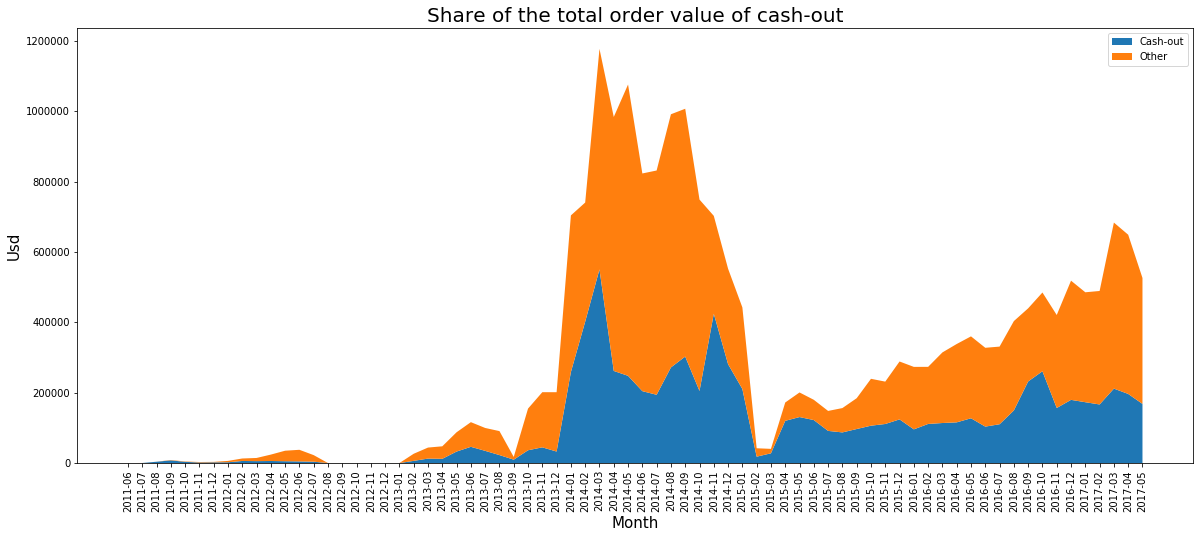

In [239]:
plt.figure(figsize=(20,8))
plt.stackplot(x,y1, y2, labels=['Cash-out','Other'])
plt.title("Share of the total order value of cash-out", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Usd", fontsize=15)
plt.legend(loc = 'upper right')
plt.savefig("Share_of_cash_out.jpg", dpi=300)

### Total order amount

In [229]:
total_order_marketplace = feedbacks_wo_drugs.groupby(["date", "marketplace"]).sum().order_amount_usd.unstack().fillna(value = 0)
total_order_marketplace.index = pd.to_datetime(total_order_marketplace.index)
total_order_marketplace = total_order_marketplace.groupby(pd.Grouper(freq = "M")).sum()

In [230]:
series = pd.Series(total_order_marketplace.index.values)
x = list(series.dt.strftime('%Y-%m'))

y1 = list(total_order_marketplace.Agora)
y2 = list(total_order_marketplace.Alphabay)
y3 = list(total_order_marketplace["Black Market Reloaded"])
y4 = list(total_order_marketplace.Evolution)
y5 = list(total_order_marketplace.Hydra)
y6 = list(total_order_marketplace.Pandora)
y7 = list(total_order_marketplace["Silk Road 1"])
y8 = list(total_order_marketplace["Silk Road 2"])

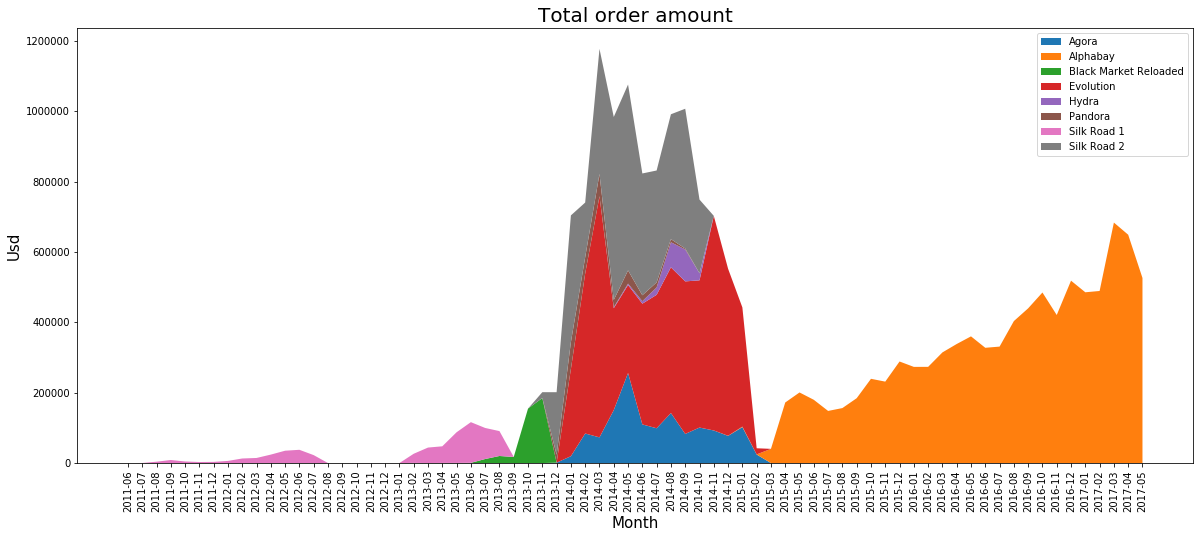

In [232]:
plt.figure(figsize=(20,8))
plt.stackplot(x,y1, y2, y3, y4, y5, y6, y7, y8, labels=['Agora','Alphabay','Black Market Reloaded', "Evolution", "Hydra", "Pandora", "Silk Road 1", "Silk Road 2"])
plt.title("Total order amount", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Usd", fontsize=15)
plt.legend(loc = 'upper right')
plt.savefig("Total_order_amount_cash_out_per_market.jpg", dpi=300)

### Average feedback value per market

In [147]:
feedbacks_cash_out = feedbacks[feedbacks.category == "cash-out"]
total_feedback_marketplace = feedbacks_cash_out.groupby(["date", "marketplace"]).mean().feedback_value.unstack().fillna(value = 0)
total_feedback_marketplace.index = pd.to_datetime(total_feedback_marketplace.index)
total_feedback_marketplace = total_feedback_marketplace.groupby(pd.Grouper(freq = "M")).sum()

In [148]:
average_feedback_marketplace = total_feedback_marketplace.groupby([total_feedback_marketplace.index.year, total_feedback_marketplace.index.month]).transform(lambda x: x/x.mean())
average_feedback_marketplace.fillna(0, inplace = True)

In [240]:
series = pd.Series(average_feedback_marketplace.index.values)
x = list(series.dt.strftime('%Y-%m'))

y1 = list(average_feedback_marketplace.Agora)
y2 = list(average_feedback_marketplace.Alphabay)
y3 = list(average_feedback_marketplace["Black Market Reloaded"])
y4 = list(average_feedback_marketplace.Evolution)
y5 = list(average_feedback_marketplace.Hydra)
y6 = list(average_feedback_marketplace.Pandora)
y7 = list(average_feedback_marketplace["Silk Road 1"])
y8 = list(average_feedback_marketplace["Silk Road 2"])

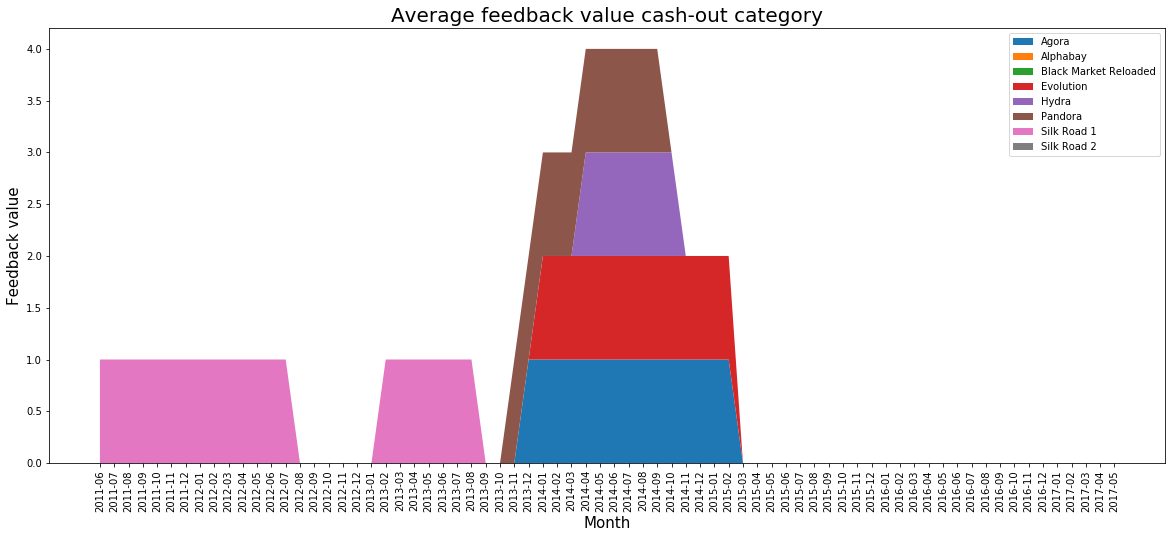

In [241]:
plt.figure(figsize=(20,8))
plt.stackplot(x,y1, y2, y3, y4, y5, y6, y7, y8, labels=['Agora','Alphabay','Black Market Reloaded', "Evolution", "Hydra", "Pandora", "Silk Road 1", "Silk Road 2"])
plt.title("Average feedback value cash-out category", fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Feedback value", fontsize=15)
plt.legend(loc = 'upper right')
plt.savefig("Average_feedback_value_cash_out.jpg", dpi=300)

Conclusion: as can be seen in the figure the feedback value for cash-out products is higher for the market Pandora.Next to that it can be seen that some markets have a 0 value for the feedback in the cash-out category.

### Number of cash-out products sold per market per year

We are going to look at the number of cash-out products sold per year of the marketplace

In [219]:
feedbacks2 = feedbacks_cash_out.groupby(["marketplace", "date"]).sum().feedback_value.unstack(-2)

In [220]:
feedbacks2

marketplace,Agora,Alphabay,Black Market Reloaded,Evolution,Hydra,Pandora,Silk Road 1,Silk Road 2
date,,,,,,,,
2011-06-22,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN
2011-06-23,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2011-06-25,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
2011-06-27,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN
2011-06-28,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...
2017-05-22,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
feedbacks3 = feedbacks2.groupby(pd.Grouper(freq = "Y")).sum()

In [222]:
for x in feedbacks3.columns.values:
    deltatime = feedbacks_time.loc[x]['difference', ''].days
    feedbacks3[x] = feedbacks3[x]/deltatime

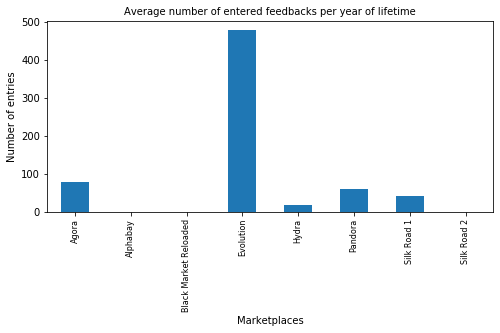

In [275]:
plt.figure(figsize=(8,5))
feedbacks3.sum().plot(kind = 'bar')
plt.title('Average number of entered feedbacks per year of lifetime', fontsize = 10)
plt.ylabel('Number of entries')
plt.xlabel('Marketplaces')
plt.xticks(fontsize = 8)
plt.gcf().subplots_adjust(bottom=0.35)
plt.savefig("Average_num_entered_feedbacks_cash_out.jpg", dpi=300)

### Keyword analysis cash-out

To see what words were used most in the title of the order a small keyword analysis was performed to look at the amount of times that a word occurred in a certain title.

In [279]:
freq = pd.Series(' '.join(feedbacks_cash_out['order_title']).split()).value_counts()[:50]

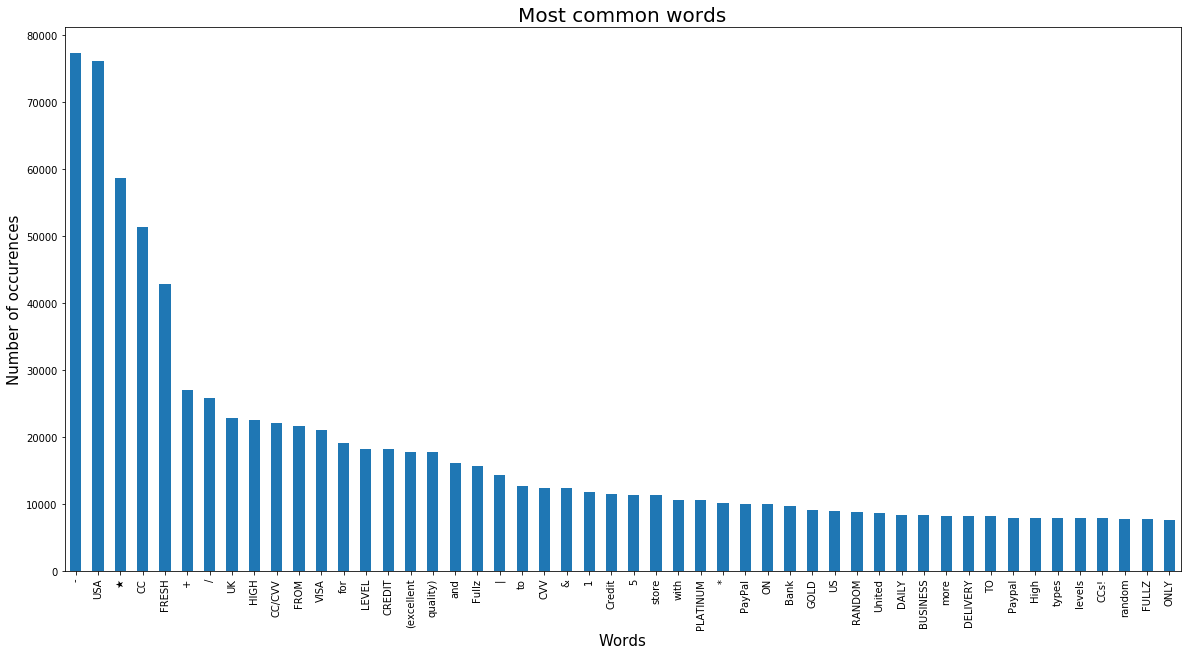

In [282]:
plt.figure(figsize=(20,10))
freq.plot(kind = 'bar')
plt.title("Most common words", fontsize=20)
plt.xlabel("Words", fontsize=15)
plt.ylabel("Number of occurences", fontsize=15)
plt.savefig("Keyword_analysis_cash_out.jpg", dpi=300)